# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notration, the matrix $X$ is of dimensions $n \times p$ where is each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* **Bonus:** Repeat for coordinate descent by creating a new class `OrdinaryLinearRegressionCoordinateDescent` which also inherits from `OrdinaryLinearRegression`. Compare the learning curves.


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy.linalg import inv, pinv


In [3]:
np.random.seed(42) # seed for reproducibility

In [4]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


***

- p = 13 (number of features)
- n = 506 (number of training examples)

***

In [5]:
# OrdinaryLinearRegression

class Ols(object):
    def __init__(self):
        self.w = None

    @staticmethod
    def pad(X):
        X_0 = np.array([[1] * X.shape[0]])
        return np.concatenate((X_0.T, X), axis=1)

    def fit(self, X, y):
        X = Ols.pad(X)  # pad with 1 before fitting
        self.w = np.dot(pinv(X), y)

    def predict(self, X):
        X = Ols.pad(X)  # pad with 1 before predicting
        return np.dot(X, self.w)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean((y - y_pred)**2)


In [6]:
# Run OLS

lin_reg = Ols()
lin_reg.fit(X, y)
whole_data_score = lin_reg.score(X, y)
print(f'MSE on whole (train) data = {whole_data_score:.3f}')


MSE on whole (train) data = 21.895


__plot y vs y hat__

Text(0.5, 1.0, 'Actual vs. Predicted values')

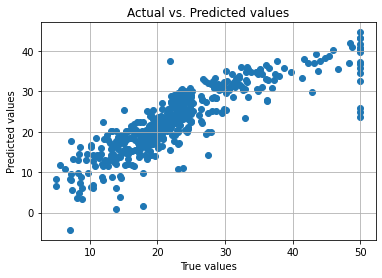

In [7]:
y_pred = lin_reg.predict(X)

# plot
plt.scatter(y, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.grid()
plt.title('Actual vs. Predicted values')

__Split the data to 75% train and 25% test 20 times.__

__What is the average MSE now for train and test? Hint: use train_test_split or ShuffleSplit.__

In [8]:
SPLITS = 20

test_mse_vec = []
train_mse_vec = []

for i in range(SPLITS):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True)

    lin_reg = Ols()
    lin_reg.fit(x_train, y_train)
    mse_train = lin_reg.score(x_train, y_train)
    mse_test = lin_reg.score(x_test, y_test)
    
    test_mse_vec.append(mse_test)
    train_mse_vec.append(mse_train)


print(f'mean MSE on train data = {np.mean(train_mse_vec):.3f}')
print(f'mean MSE on test data = {np.mean(test_mse_vec):.3f}')


mean MSE on train data = 21.194
mean MSE on test data = 25.508


#### Use a t-test to proove that the MSE for training is significantly smaller than for testing.  What is the p-value?



In [9]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(test_mse_vec,train_mse_vec)

print(f't-test = {t_stat:.3f} p-value = {p_value:.3f}')

t-test = 2.323 p-value = 0.031


***

Our Null hypothesis is that the MSE average is equal for both training and test set.

Since the P-value is `0.031` and is smaller then `0.05`, we reject the null hypothesis of equal MSE averages for both training and test set with 95% confidence level.
***

In [10]:
class Normalizer():
    
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis = 0)
        self.std=np.std(X,axis=0)
        return self

    def predict(self, X):
        return (X - self.mean) / self.std

In [11]:
class OlsGd(Ols):

    
    def __init__(self, learning_rate=0.05,
                 num_iteration=10000,
                 normalize=True,
                 early_stop=True,
                 verbose=True, 
                 ridge_lambda = 0):
        super(OlsGd, self).__init__()
        self.learning_rate = learning_rate
        self.num_iteration = num_iteration
        self.early_stop = early_stop
        self.normalize = normalize
        self.normalizer = Normalizer()
        self.verbose = verbose
        self.loss_history = []      # for plotting GD progress
        self.converge_step = None   # for determining how many iterations were required for convergence
        self.w = None
        self.epsilon = 1e-3
        self.ridge_lambda = ridge_lambda

        
    def normalize_and_pad(self, X):
        
        if self.normalize:
            X = self.normalizer.fit(X).predict(X)
        X = Ols.pad(X)  # pad with 1 before fitting
            
        return X
     
        
    def fit(self, X, y, reset=True, track_loss=True):
       
        X = self.normalize_and_pad(X)
        loss_history = []
        
        # initialize weights 
        if reset:
            self.w = np.zeros(X.shape[1])
        else:
            self.w = np.random.uniform(size=X.shape[1])  
            
        iteration = 1    
        for iteration in range(1, self.num_iteration + 1):
            
            self._step(X, y)
            
            # calculate cost
            y_pred = np.dot(X, self.w)
            mse = OlsGd.mse(y, y_pred)
            
            if self.verbose:
                print(f'after step {iteration} - mse = {mse:.3f}')

            loss_history.append(mse)
            
            # loss is growing
            if iteration > 5 and loss_history[-1] > loss_history[-4]:
                print(f'loss in not converging with learning rate {self.learning_rate}')
                # ideally we shoud try to reduce the error rate as it's too big
                break  # otherwise the error keeps growing until we get NaN
                
            # check if the loss stopped improving
            if self.early_stop and iteration > 1:
                if loss_history[-2] - loss_history[-1] < self.epsilon : 
                    if type(self) == 'OlsGd':
                        print(f'Learning rate {self.learning_rate}: loss converged after {iteration} iterations.')
                    break           
                        
        self.converge_step = iteration
        
        if track_loss:
            self.loss_history = loss_history
        
        return self

 
    def _step(self, X, y):
        
        gradient =  np.dot(X.T, np.dot(X, self.w) - y) * (2 / len(y)) + 2 * self.ridge_lambda / len(y) * self.w    
        self.w -= self.learning_rate * gradient
        
        
    def predict(self, X):
        X = self.normalize_and_pad(X)
        return np.dot(X, self.w)
    
    @staticmethod
    def mse(y, y_pred):
        return np.mean((y - y_pred) ** 2)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return OlsGd.mse(y, y_pred)




In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 2)

print('train shape = ', x_train.shape)
print('test shape = ', x_test.shape)

train shape =  (379, 13)
test shape =  (127, 13)


In [13]:
# Let's run OLS and check the MSE on train and test data
lin_reg = Ols()

lin_reg.fit(x_train, y_train)

print(f'MSE OLS on train data = {lin_reg.score(x_train, y_train):.3f}')
print(f'MSE OLS on test data = {lin_reg.score(x_test, y_test):.3f}')


MSE OLS on train data = 22.041
MSE OLS on test data = 22.160


In [14]:
# helper function

def plot_loss(loss, iterations, title = 'Loss function'):
    plt.title(title);
    plt.plot(np.arange(1, iterations + 1), loss)
    plt.xlabel('number of iterations')
    plt.grid()
    plt.ylabel('Loss Function value (MSE)')


MSE Gradient Descent on train data = 22.106 
MSE Gradient Descent on test data = 22.430  


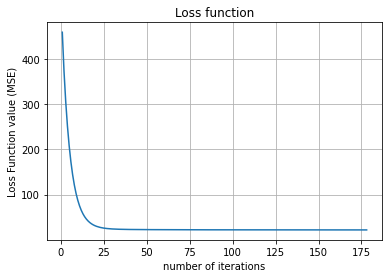

In [15]:
# Run Gradient Descent

lin_reg_gd = OlsGd(num_iteration=10000, learning_rate = 0.05, verbose = False)
lin_reg_gd.fit(x_train, y_train)
y_test_pred_gd = lin_reg_gd.predict(x_test)

print('MSE Gradient Descent on train data = %.3f '% lin_reg_gd.score(x_train, y_train))
print('MSE Gradient Descent on test data = %.3f  '% lin_reg_gd.score(x_test, y_test))

plot_loss(lin_reg_gd.loss_history, lin_reg_gd.converge_step )


In [16]:
# Helper function that finds the best learning rate


def find_best_learning_rate(learning_rates, max_iterations, plot = False):
        
    mse_vec = []
    best_lr = None
    min_mse = np.inf
    best_converge = np.inf
    
    fig = plt.figure(figsize=(20,25))
    for i, learning_rate in enumerate(learning_rates):

        lin_reg_gd = OlsGd(learning_rate=learning_rate, num_iteration=max_iterations, verbose = False)
        lin_reg_gd.fit(x_train, y_train)
        mse = lin_reg_gd.score(x_test,y_test)
        converged = lin_reg_gd.converge_step

        mse_vec.append(mse)
        
        if mse <= min_mse and converged < best_converge:
            min_mse = mse
            best_converge = converged
            best_lr = learning_rate
    
        if plot:
            title = f'learning rate = {learning_rate:.3f}, mse = {mse:.3f}, converge = {lin_reg_gd.converge_step}'
            fig.add_subplot(3, 3, i+1)
            plot_loss(lin_reg_gd.loss_history, lin_reg_gd.converge_step , title)

    plt.show()
    plt.tight_layout()
    print(f'best lr rate is {best_lr}, mse = {min_mse:.2f}, converged in {best_converge} steps')
    
    return best_lr
    

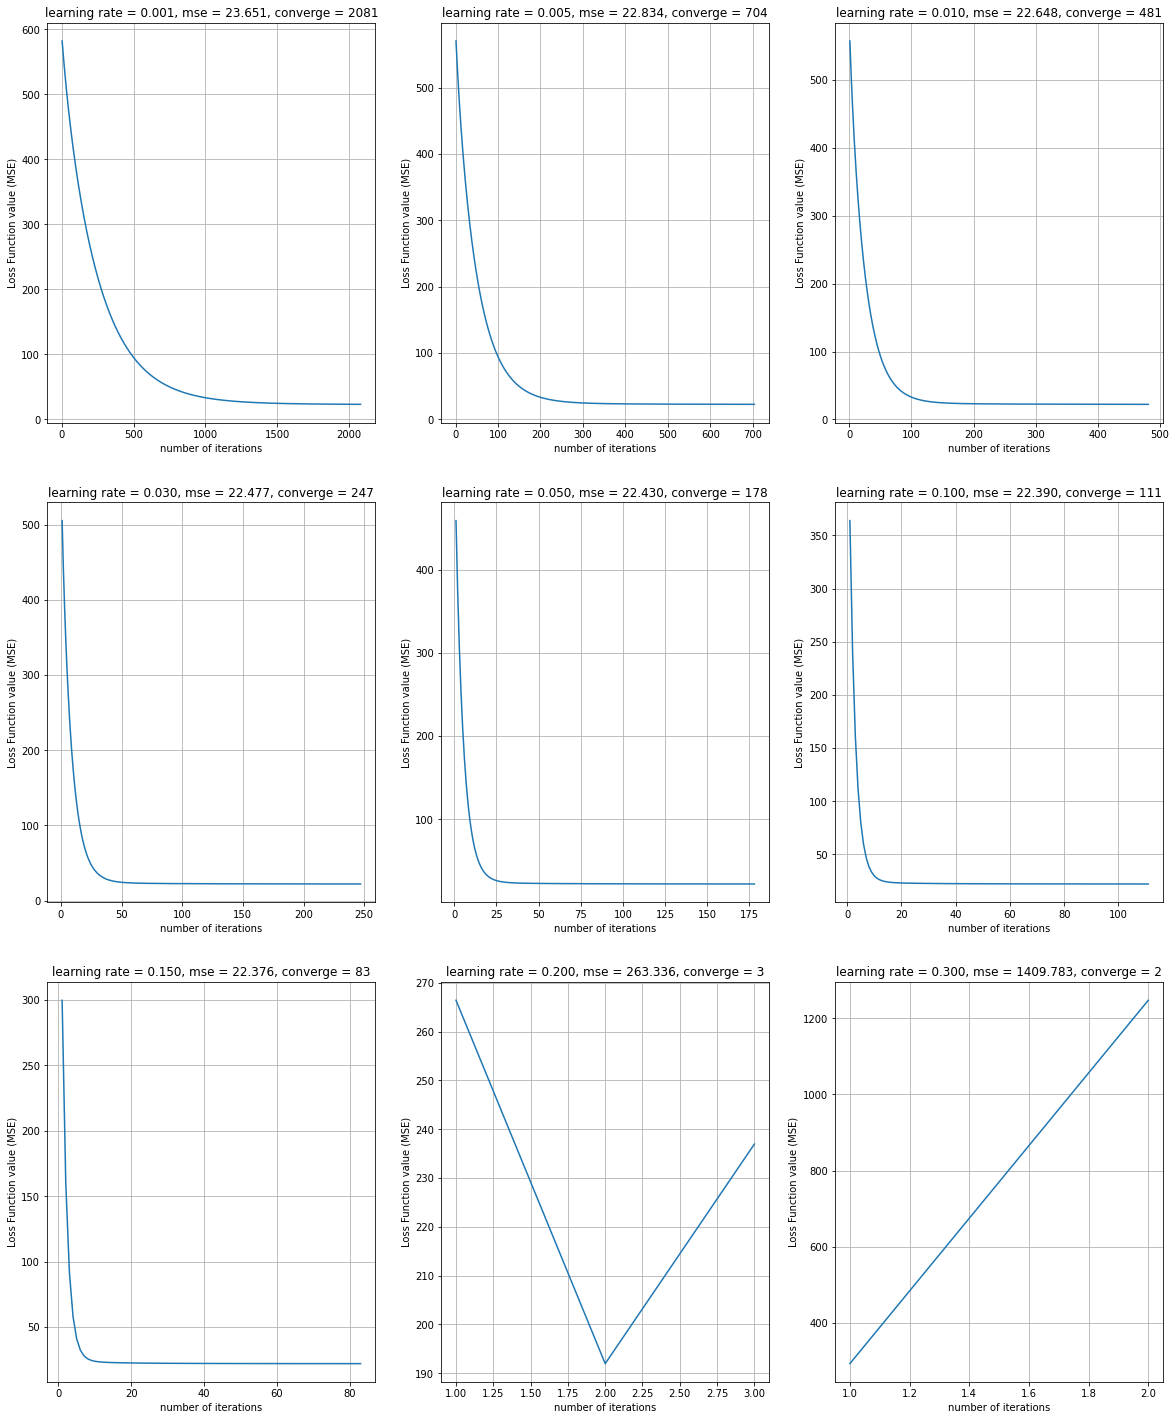

best lr rate is 0.15, mse = 22.38, converged in 83 steps


<Figure size 432x288 with 0 Axes>

In [17]:
max_iterations = 5000
learning_rates = [0.001, 0.005, 0.01, 0.03, 0.05, 0.1, 0.15,  0.2,  0.3]

best_lr = find_best_learning_rate(learning_rates, max_iterations, plot = True);

__What is the effect of learning rate? How would you find number of iteration automatically?__

***

The learning rate determines the size of the step in gradient descent. when it's small - the algorithm converges very slowly (and if number of iterations is limited - it will reduce the accuracy of the result). If it's too big - the algorithm might not converge at all (as the step size is so big that we skip the minimum)

We found the best learning rate by using different learning rates, and choosing the one that converges most quickly while keeping a minimal MSE.

To find the max number of iterations, we can run a loop that starts with a small number of iterations and checks the MSE, and keeps gradually increasing the number of iterations until the MSE is not improving anymore (the improvement is smaller than an epsilon we determine). This is basically the same as early stop, where if set to True, the algorithm will stop running if the MSE is not improving (more then an epsilon we determined). As the number of Max iterations is dependant on the learning rate, we can either first choose the best learning rate, or take a small learning rate (which will require the highest number of max iterations) and use that to ensure that the max number of iterations we find will be sufficient for other (higher) learning rates. Note that we don't take the full number of iterations but we calculate the 'elbow' of the graph - where the mse score gets into a 'plateau' i.e. the rounded mse score remains the same.  

***

learning rate: 0.001, num of iterations:2081
learning rate: 0.005, num of iterations:704
learning rate: 0.01, num of iterations:481
learning rate: 0.03, num of iterations:247
learning rate: 0.05, num of iterations:178
learning rate: 0.1, num of iterations:111
learning rate: 0.15, num of iterations:83
Minimal number of iterations across different learning rates: 2082


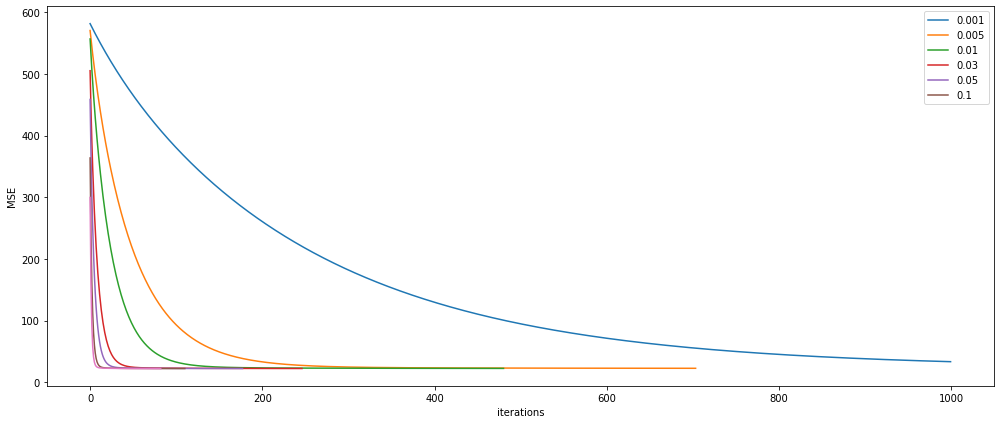

In [18]:
# let's find the minimal number of iterations for different learning rates that achieves the minimal MSE:

learning_rates = [0.001, 0.005, 0.01, 0.03, 0.05, 0.1, 0.15]

iter_=np.zeros((len(learning_rates),10000))

plt.figure(figsize=(14,6))
i=0
for alpha in learning_rates:
    ols_g = OlsGd(learning_rate=alpha, verbose=False)
    ols_g.fit(x_train,y_train)
    errors=ols_g.loss_history
    iter_[i,0:len(errors)]=errors
    iter_[i]=np.around(iter_[i])
    print(f"learning rate: {alpha}, num of iterations:{len(errors)}")
    plt.legend(learning_rates)
    plt.plot(np.arange(len(errors[0:1000])), errors[0:1000])
    plt.xlabel('iterations')
    plt.ylabel('MSE')
    plt.tight_layout()
    i=i+1
max_err= np.amax(iter_, axis=0)
print(f"Minimal number of iterations across different learning rates: {np.argmin(max_err)+1}")
    

__Repeat for coordinate descent by creating a new class OrdinaryLinearRegressionCoordinateDescent which also inherits from OrdinaryLinearRegression. Compare the learning curves.__


In [19]:
class OlsCd(OlsGd):
    """coordinate descent"""

    def __init__(self, *wargs, **kwargs):
        super(OlsCd, self).__init__(*wargs, **kwargs)
        
        
    def _step(self, X, y):
    
        for feature in range(X.shape[1]):
            feat_vec = X[:, feature]
            X_without_feature = np.delete(X, feature, axis=1)
            weights_without_feature = np.delete(self.w, feature, axis=0)

            y_hat_without_feature = np.dot(X_without_feature, weights_without_feature)
            self.w[feature] = np.dot( feat_vec.T, y - y_hat_without_feature) / np.sum(np.square(feat_vec))


    # implementation of coordinate descent using a learning rate
    def _step_with_lr(self, X, y):
    
        for i in range(X.shape[1]):
            y0= np.dot(X,self.w)
            y_temp= y0-X[:,i]*self.w[i]
            self.w[i] -= np.dot((self.learning_rate * 2 / y.size * X[:,i].T),(X[:,i] * self.w[i] + y_temp - y))


MSE Coordinate Descent on train data = 22.106 
MSE Coordinate Descent on test data = 22.430  


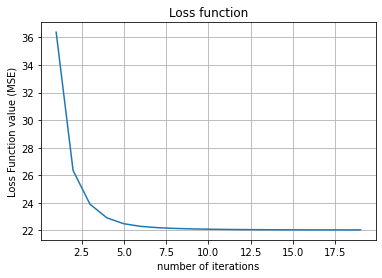

In [20]:
# Run Coordiante Descent

lin_reg_cd = OlsCd(num_iteration=10000, verbose = False)
lin_reg_cd.fit(x_train, y_train)

y_test_pred_cd = lin_reg_cd.predict(x_test)

print('MSE Coordinate Descent on train data = %.3f '% lin_reg_gd.score(x_train, y_train))
print('MSE Coordinate Descent on test data = %.3f  '% lin_reg_gd.score(x_test, y_test))


plot_loss(lin_reg_cd.loss_history, lin_reg_cd.converge_step )

__compare learning curves__

In [21]:
# Run Gradient Descent

lin_reg_gd = OlsGd(num_iteration=10000, verbose = False)
lin_reg_gd.fit(x_train, y_train);

0.05


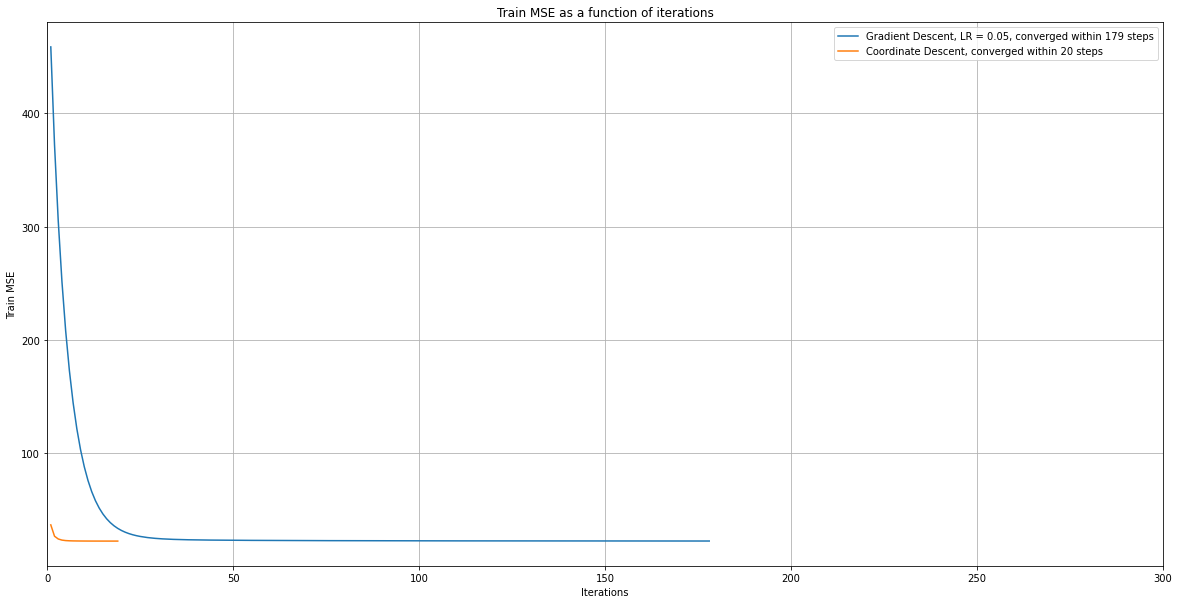

In [22]:
# Plot and compare Gradient Descent with Coordinate Descent

fig = plt.figure(figsize = (20,10))
plt.title('Train MSE as a function of iterations');
plt.plot(np.arange(1, lin_reg_gd.converge_step + 1), lin_reg_gd.loss_history, 
         label = f'Gradient Descent, LR = {lin_reg_gd.learning_rate}, converged within {lin_reg_gd.converge_step + 1} steps')
plt.plot(np.arange(1, lin_reg_cd.converge_step + 1), lin_reg_cd.loss_history, 
         label = f'Coordinate Descent, converged within {lin_reg_cd.converge_step + 1} steps')
plt.xlabel('Iterations')
plt.grid()
plt.ylabel('Train MSE')
plt.legend()
plt.xlim((0,300))
print(lin_reg_gd.learning_rate)

***
Looking at these curves, we see that with a learning rate of 0.05 Gradient Descent converges more slowly than Coordinate Descent which converges really quickly. The convergence of Gradient Descent depends on the learning rate, which we will see in the next plot.
***

__On the test data plot the for each of the methods Ols, OlsGD, and OlsCD plot the MSE with respect to the iterations__


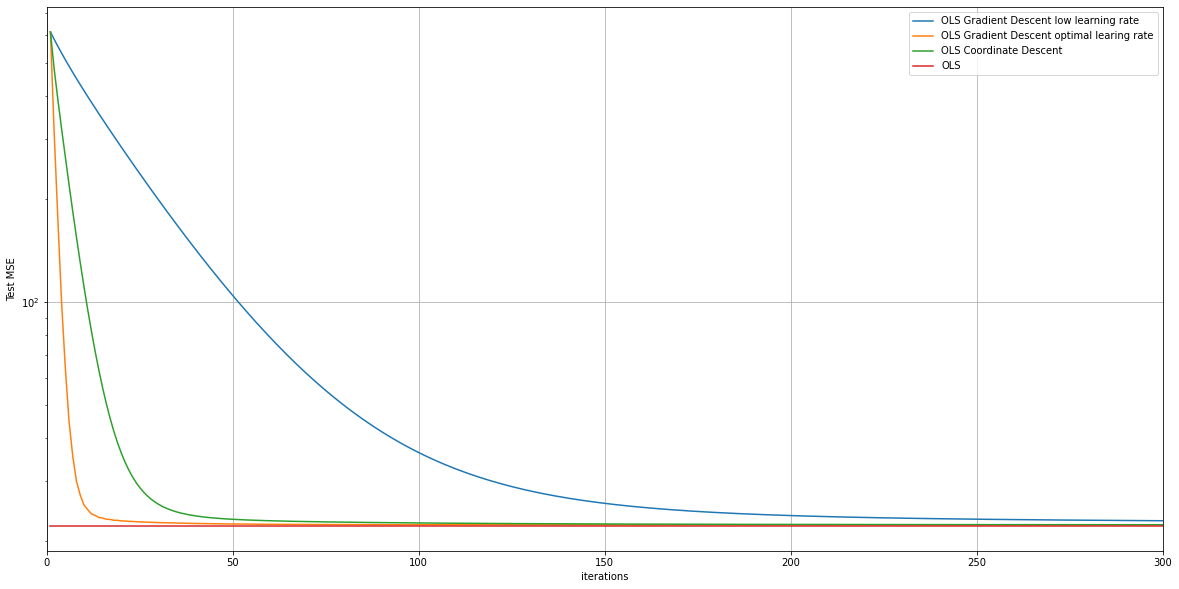

In [23]:
max_iterations = 400

mse_test_ols = [0] * max_iterations
mse_test_gd = [0] * max_iterations
mse_test_gd2 = [0] * max_iterations
mse_test_cd = [0] * max_iterations

for it in range(max_iterations):
    
    mse_test_ols[it] = lin_reg.score(x_test, y_test)

    # gradient descent with low learning rate
    lin_reg_gd = OlsGd(learning_rate=0.01, num_iteration=it, verbose = False, early_stop=False)
    lin_reg_gd.fit(x_train, y_train)
    mse_test_gd[it] = lin_reg_gd.score(x_test,y_test)

    # gradient descent with the best learning rate we found earlier
    lin_reg_gd2 = OlsGd(learning_rate=best_lr, num_iteration=it, verbose = False, early_stop=False)
    lin_reg_gd2.fit(x_train, y_train)
    mse_test_gd2[it] = lin_reg_gd2.score(x_test,y_test)

    lin_reg_cd = OlsGd(num_iteration=it, verbose = False, early_stop=False)
    lin_reg_cd.fit(x_train, y_train)
    mse_test_cd[it] = lin_reg_cd.score(x_test,y_test)


fig = plt.figure(figsize = (20, 10))
plt.plot(np.arange(1, max_iterations + 1), mse_test_gd, label = 'OLS Gradient Descent low learning rate')
plt.plot(np.arange(1, max_iterations + 1), mse_test_gd2, label = 'OLS Gradient Descent optimal learing rate')
plt.plot(np.arange(1, max_iterations + 1), mse_test_cd, label = 'OLS Coordinate Descent')
plt.plot(np.arange(1, max_iterations + 1), mse_test_ols, label = 'OLS')

plt.xlabel('iterations')
plt.legend()
plt.yscale('log')
plt.xlim(0,300)
plt.grid()
plt.ylabel('Test MSE');


## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\frac{1}{N}\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2$

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 




-------------------------


$L(y,\hat{y})=\frac{1}{N}\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

$L= \left\Vert Xw-y \right\Vert^2  + \lambda \left\Vert w \right\Vert_2 ^2$


$L= (Xw-y)^T (Xw-y)  + \lambda w^Tw$

$L= (w^TX^TXw - w^TX^Ty + y^Ty - y^TXw)  + \lambda w^Tw$

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L}}{\partial{w}}= 2 X^T X w - \frac{\partial{L}}{\partial{w}}(w^TX^Ty - y^TXw) +  2 \lambda w $ 


$\frac{\partial{L}}{\partial{w}}= 2 X^T X w - \frac{\partial{L}}{\partial{w}}((Xw)^T y - y^TXw) +  2 \lambda w $ 



$\frac{\partial{L}}{\partial{w}}= 2 X^T X w - \frac{\partial{L}}{\partial{w}}((Xw)^T y - X^T y w) +  2 \lambda w $ 



$\frac{\partial{L}}{\partial{w}}= 2 X^T X w - X^Ty  - X^T y +  2 \lambda w $ 






$\frac{\partial{L}}{\partial{w}}=  2 X^T X w - 2X^T y +  2 \lambda w $ 

and let's compare the derivative to 0 to find the analytical solution:

$ 2 X^T X w - 2X^T y +  2 \lambda w  = 0 $ 


$ 2 X^T X w +  2 \lambda w  = 2X^Ty $ 

$ X^T X w +  \lambda I w  = X^Ty $ 

$ w (X^T X + \lambda I) =X^T y $


$ w  = \frac{X^T y }{(X^T X +  \lambda I)}$


$ \rightarrow w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$


__Change OrdinaryLinearRegression and OrdinaryLinearRegressionGradientDescent classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.__

In [24]:
class RidgeLs(Ols):
    
    def __init__(self, ridge_lambda, *wargs, **kwargs):
        super(RidgeLs,self).__init__(*wargs, **kwargs)
        self.ridge_lambda = ridge_lambda

    def fit(self, X, y):
        X = Ols.pad(X)  # pad with 1 before fitting
        self.w = np.dot(inv(np.dot(X.T, X) + self.ridge_lambda * np.identity(X.shape[1])), np.dot(X.T, y))
        


In [25]:
# Run Ridge regression

ridge_reg = RidgeLs(1)
ridge_reg.fit(x_train, y_train)

print(f'MSE Ridge on train data = {ridge_reg.score(x_train, y_train):.3f}')
print(f'MSE Ridge on test data = {ridge_reg.score(x_test, y_test):.3f}')


MSE Ridge on train data = 23.048
MSE Ridge on test data = 22.763


***

for GD we added the ridge lambda as a parameter in the implemention above
***

In [26]:
# Run sklearn Ridge regression (for comparison)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

normalizer = Normalizer().fit(x_train)
x_train_nor = normalizer.predict(x_train)
x_test_nor = normalizer.predict(x_test)

ridge_sk = Ridge(alpha=1.0)
ridge_sk.fit(x_train_nor, y_train)
y_test_pred = ridge_sk.predict(x_test_nor)
y_train_pred = ridge_sk.predict(x_train_nor)

print(f'MSE SKLearn Ridge on train data = {mean_squared_error(y_test,y_test_pred):.3f}')
print(f'MSE SKLearn Ridge on test data = {mean_squared_error(y_train,y_train_pred):.3f}')

df_sk_ridge_weights = pd.DataFrame(ridge_sk.coef_)
display(df_sk_ridge_weights)



MSE SKLearn Ridge on train data = 22.152
MSE SKLearn Ridge on test data = 22.042


,0
0,-0.837506
1,0.743458
2,-0.137715
3,0.854408
4,-1.831978
5,2.547539
6,0.119160
7,-2.914610
8,2.630303
9,-1.936288


In [27]:
# Run Gradient Descent with Ridge regression

ridge_gd_reg = OlsGd(ridge_lambda = 1, num_iteration=10000, learning_rate = 0.1, verbose = False)
ridge_gd_reg.fit(x_train, y_train)

print(f'MSE Ridge GD on train data = {ridge_gd_reg.score(x_train, y_train):.3f}')
print(f'MSE Ridge GD on test data = {ridge_gd_reg.score(x_test, y_test):.3f}')

df_gd_ridge_weights = pd.DataFrame(ridge_gd_reg.w[1:])
display(df_gd_ridge_weights)

MSE Ridge GD on train data = 22.083
MSE Ridge GD on test data = 22.457


,0
0,-0.807598
1,0.698988
2,-0.284941
3,0.877786
4,-1.772580
5,2.580235
6,0.098562
7,-2.896310
8,2.234926
9,-1.507858


__Bonus: Noise as a regularizer: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the average solution for  𝑊__
W
  is equivalent to Ridge regression. In other words, if  𝑋′=𝑋∗𝐺
X
′
=
X
∗
G
  where  𝐺
G
  is an uncorrelated noise with variance  𝜎
σ
  and mean 1, then solving for  𝑋′
X
′
 with OLS is like solving Ridge for  𝑋
X
 . What is the interpretation?

In [28]:
def create_noise(std = 0.5):
    noise_mat = np.zeros_like(x_train)

    for feat in range(x_train.shape[1]):
        noise = np.random.normal(1, std,size = (x_train.shape[0]))
        noise_mat[:,feat] = noise

    return noise_mat

In [29]:
NUM_NOISE = 5
ITERATIONS = 1000

noise_values = np.linspace(0.1, 5, NUM_NOISE)

def find_ols_weights_for_diff_noise_values():
    '''average weights on linear OLS classifier for different noise values'''
    
    lin_reg_ols = Ols()
    ols_weights = np.zeros((x_train.shape[1] + 1, NUM_NOISE)) 
    weights_temp_matrix = np.zeros((x_train.shape[1] + 1, ITERATIONS)) 

    for i, noise_std in enumerate(noise_values):
        for it in range(ITERATIONS):
            noise_matrix = create_noise(noise_std)        
            x_train_noise = numpy.multiply(x_train, noise_matrix)
            lin_reg_ols.fit(x_train_noise, y_train)
            weights_temp_matrix[:,it] = lin_reg_ols.w
            
        ols_weights[:,i] = np.mean(weights_temp_matrix, axis = 1)

    df_ols_weights = pd.DataFrame(ols_weights, columns = noise_values)
    display(df_ols_weights)
    return df_ols_weights


df_ols_weights = find_ols_weights_for_diff_noise_values()      


,0.100,1.325,2.550,3.775,5.000
0,35.934018,24.890451,23.346578,22.913042,22.709230
1,-0.092172,-0.097341,-0.041819,-0.022397,-0.012960
2,0.056878,0.030757,0.013160,0.006961,0.004148
3,-0.129669,-0.052237,-0.020147,-0.010245,-0.006320
4,4.229072,2.605920,0.976585,0.456002,0.265091
5,-5.889105,-0.376535,-0.164426,-0.087128,-0.047076
6,1.834813,0.049299,0.015815,0.005857,0.004287
7,0.006574,-0.004565,-0.001892,-0.001070,-0.000620
8,-1.343182,0.019756,0.022372,0.013523,0.006790
9,0.191655,-0.042524,-0.020511,-0.009829,-0.005693


***

We can see that the weights are getting smaller as the noise increases (std of the noise is larger)
***

In [30]:
from sklearn.metrics import mean_squared_error

def find_ols_avg_weights_with_noise(noise_std):
    '''average weights in OLS classifier for a specific noise values'''
    
    lin_reg_ols = Ols()
    ols_weights = np.zeros((x_train.shape[1] + 1)) 
    ols_weights_temp_matrix = np.zeros((x_train.shape[1] + 1, ITERATIONS)) 

    for it in range(ITERATIONS):
        noise_matrix = create_noise(noise_std)        
        x_train_noise = numpy.multiply(x_train, noise_matrix)
        normalizer = Normalizer().fit(x_train_noise)
        x_train_noise_nor = normalizer.predict(x_train_noise)
        
        lin_reg_ols.fit(x_train_noise_nor, y_train)
        ols_weights_temp_matrix[:,it] = lin_reg_ols.w

    ols_weights = np.mean(ols_weights_temp_matrix, axis = 1)

    df_ols_weights = pd.DataFrame(ols_weights[1:])
    return df_ols_weights



In [31]:
from sklearn.linear_model import Ridge, Lasso

noise_std = 3
print('average coefs for OLS for train data with noise std = ', noise_std)
df_ols_weights = find_ols_avg_weights_with_noise(noise_std)
display(df_ols_weights)

ridge_lambda = x_train.shape[0] * noise_std**2  # Number of examples * noise_std ^ 2

# ridge_reg = RidgeLs(ridge_lambda)
ridge_reg = Ridge(ridge_lambda, fit_intercept=False)
ridge_reg.fit(x_train, y_train)

print('average coefs for Ridge for train data without noise')

# df_ridge_weights = pd.DataFrame(ridge_reg.w[1:])
df_ridge_weights = pd.DataFrame(ridge_reg.coef_[1:])
display(df_ridge_weights)


average coefs for OLS for train data with noise std =  3


,0
0,-0.896584
1,0.752215
2,-0.634430
3,0.547515
4,-0.216961
5,0.211615
6,-0.339103
7,0.221692
8,-0.599416
9,-0.445997


average coefs for Ridge for train data without noise


,0
0,0.101106
1,-0.052865
2,0.040640
3,0.020538
4,0.524017
5,0.094982
6,0.001654
7,0.057571
8,0.001548
9,0.277513


In [32]:
np.sum(np.abs(df_ols_weights.loc[:,0] - df_ridge_weights.loc[:,0]))

6.743680985366854

The weights aren't as close, it might require more tuning of the ridge lambda.

The interpatation is that adding muliplicative noise to the data increases its variance (it becomes more spreaded) hence it is more difficult for the un-regularized model to fit the data (it tends more to under-fit rather than overfit). As the data is more spreaded in space, the slope of the regression line will be smaller - to cover more data on the horizontal plane. Smaller slope means smaller coefficients values - exactly as we get in Ridge regularization which also produces small values for the coefficients (by penalizing high coefficients) thus reduces over-fitting.  

## Exercise 3 - Lasso Linear Regression

As we've seen in class, Lasso Regression is a regularization technique with $L_1$ penalty on weights. This techniques creates sparse weights (some weights become effectively zero). Programming a Lasso solver is a challange and is left as an optional exercise below.
This exercise will focus on the analysis of the different regularization techniques over a toy problem using the scikit-learn implementation.

### Data generation: 1-D Polynomal Regression
```
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

```

* Use the preprocessing transformer `sklearn.preprocessing.PolynomialFeatures` in order to create a feature space. Note, you can use `sklearn.pipeline.Pipeline` in order to create an effective model which does the preprocessing (not essential).
* Use `sklearn.model_selection.cross_val_score` to evaluate each of the linear model provided by Scikit-learn (`from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV`) and compare the performance over the different `degrees`. To do so, create a 3x3 plot where each row correspond to one model and each column to one degree. Each plot should plot the train data as well as the true model and the fitted one (use 100 points in the range [0,1]) and the CV (cross validation) MSE. What is the take home message? (Note: RidgeCV and LassoCV do an internal cross-validation to determin the regularization parameter.)
* Weights spectrum: change the `alpha` parameter gradually (on a logartithmic scale) and observe how the coefficients change for `degrees=5` over alpha for Ridge and Lasso. What is the take home message?

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler

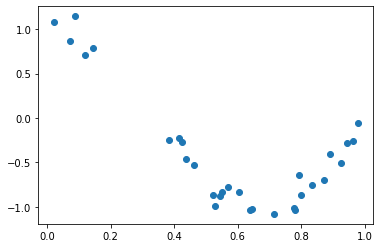

In [34]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X,y)


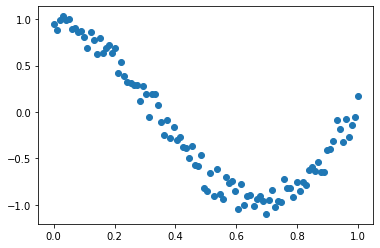

In [35]:

x_test = np.linspace(0,1, 100)  # 100 points between 0 and 1
y_test = true_fun(x_test) + np.random.randn(100) * 0.1 

plt.scatter(x_test, y_test)


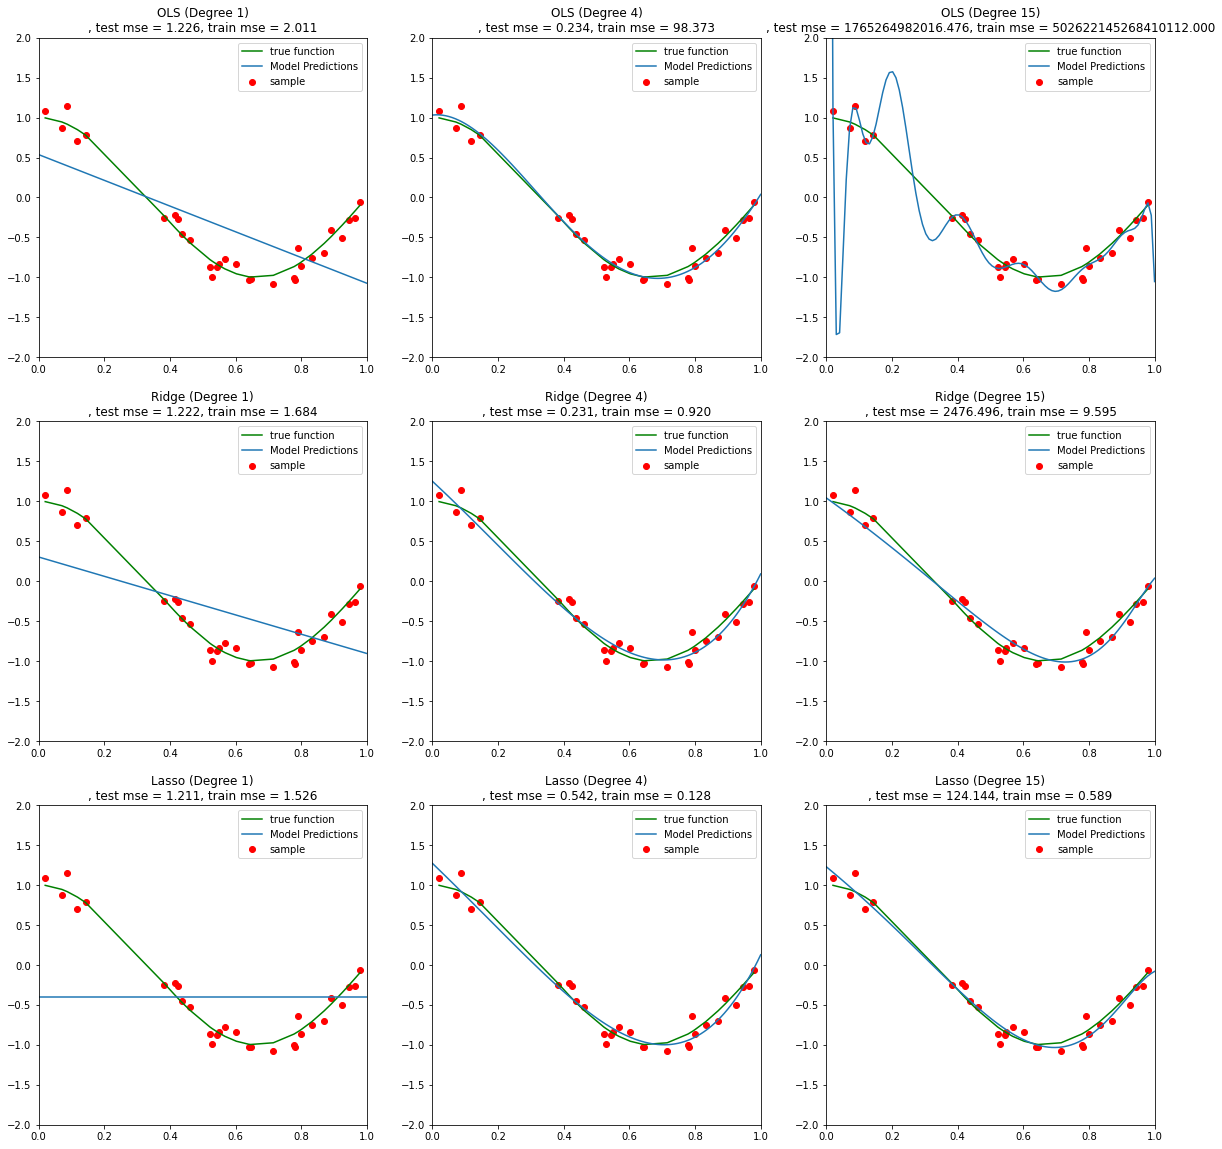

In [36]:
CV = 3

from sklearn.exceptions import ConvergenceWarning 

def plot_diff_models():


    linear = LinearRegression()
    lasso = LassoCV(cv=CV, max_iter=100000)
    ridge = RidgeCV(cv=CV )

    models = {linear: 'OLS', ridge: 'Ridge', lasso: 'Lasso'}

    fig = plt.figure(figsize=(20,20))
    i = 0

    for model, model_name in models.items():

        for deg in degrees:
            poly_features = PolynomialFeatures(degree = deg)

            pipeline = Pipeline([
                ('PolyFeatures', poly_features),
                ('scale', StandardScaler()),
                ('classifier', model),
            ])

            i += 1
            fig.add_subplot(3,3,i)
            pipeline.fit(X.reshape(-1, 1),y)
            y_pred = pipeline.predict(x_test.reshape(-1, 1))
            plt.scatter(X, y, label = 'sample', c = 'r')
            plt.plot(X, true_fun(X), label = 'true function', c = 'g')
            plt.plot(x_test, y_pred, label = 'Model Predictions')
            test_mse = cross_val_score(pipeline, x_test.reshape(-1, 1), y_test, cv=CV, scoring = 'neg_mean_squared_error')
            train_mse = cross_val_score(pipeline, X.reshape(-1, 1), y, cv=CV, scoring = 'neg_mean_squared_error')


            title = f'{(model_name)} (Degree {deg})\n, test mse = {-np.mean(test_mse):.3f}, train mse = {-np.mean(train_mse):.3f}'
            plt.ylim(-2, 2)
            plt.xlim(0, 1)
            plt.title(title)
            plt.legend()

    plt.show()
    
plot_diff_models()

__what is the take home message?__

***

__Analysis of the plots:__

- When the degree is too low, the model is not complex enough to capture the patterns in the data - we will get underfitting, and Ridge and Lasso won't make a difference. (as seen on the Degree 1 column)

- When the degree is right, Linear regression produces a good model, which is not overfitting and not underfitting  there is not much benefit using Lasso and Ridge: Ridge seems to produce similar results, but Lasso seems to slightly hurt the performance (as it's more aggressive) as seen from plots for polynom degree 4 and the MSE scores.

- when the degree is too high with regards to the data (i.e: Large number of polynomial features and small training data size), as seen in the 15-degree polynom column - the linear model is overfitting and produces a really bad model with very high MSE. Lasso and Ridge both improve the model, and in this case Lasso seems to do a better job as it's more aggresive.

__The takeaway is:__
The more overfitting you have in the model, the more regularization you should combine into the model, meaning - use the Lasso regularization which is more aggressive. If the model is doing well or has light overfitting - use the Ridge regularization.


***


__change the alpha parameter gradually (on a logartithmic scale) and observe how the coefficients change for degrees=5 over alpha for Ridge and Lasso.__

coefs for Lasso with different alphas


,0.000100,0.000774,0.005995,0.046416,0.359381,2.782559,21.544347,166.810054,1291.549665,10000.000000
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,-0.508744,-1.181693,-1.099151,-0.847343,-0.091506,-0.0,-0.0,-0.0,-0.0,-0.0
2,-1.871990,-0.042974,0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0
3,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0
4,4.010181,0.820622,0.226979,0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0
5,-1.934734,0.083623,0.561999,0.541799,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0


coefs for Ridge with different alphas


,0.000100,0.000774,0.005995,0.046416,0.359381,2.782559,21.544347,166.810054,1291.549665,10000.000000
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.219031,-0.314870,-0.816962,-1.065871,-0.990749,-0.721076,-0.270398,-0.060042,-0.009903,-0.001342
2,-2.672340,-2.802897,-1.239259,-0.358810,-0.274461,-0.246146,-0.114554,-0.035624,-0.006760,-0.000938
3,-0.042995,1.612073,0.915008,0.360965,0.166399,0.062892,-0.009910,-0.018560,-0.004487,-0.000644
4,5.557840,2.861904,1.249858,0.520720,0.369084,0.251533,0.057477,-0.007252,-0.002950,-0.000444
5,-2.923763,-1.658689,-0.420089,0.229522,0.426078,0.368524,0.102455,0.000512,-0.001876,-0.000303


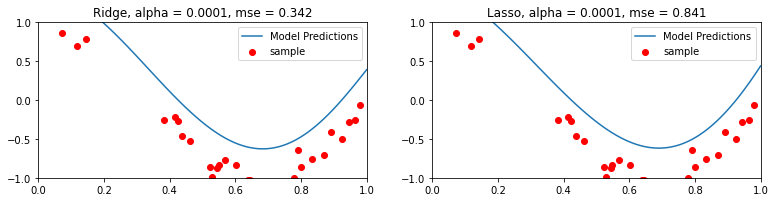

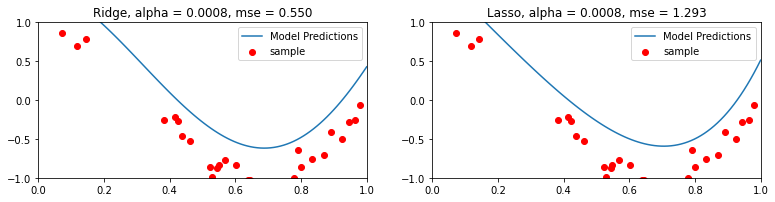

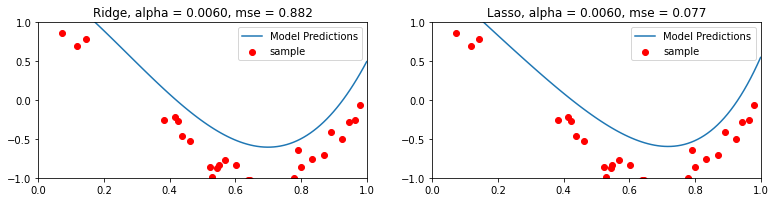

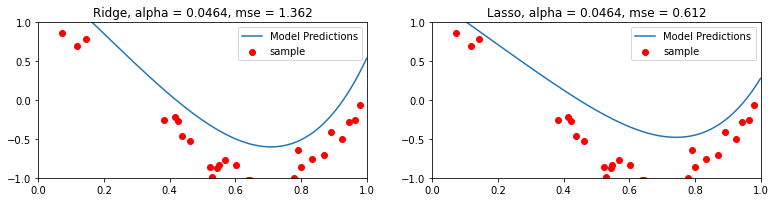

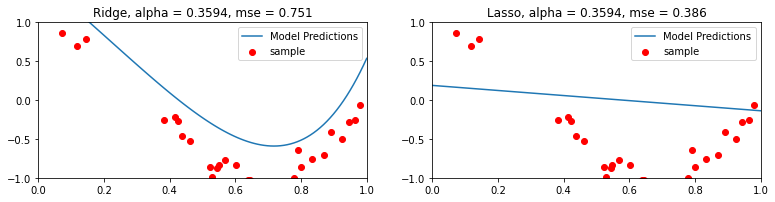

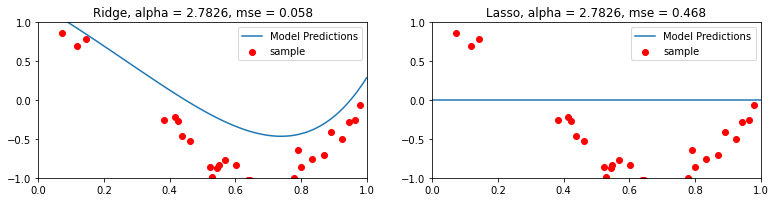

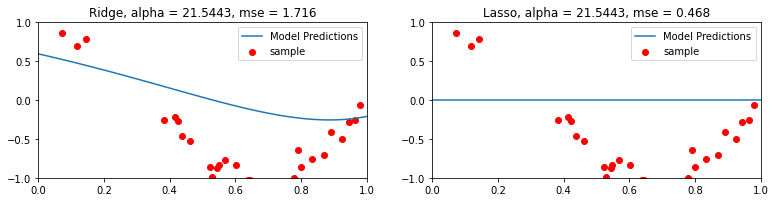

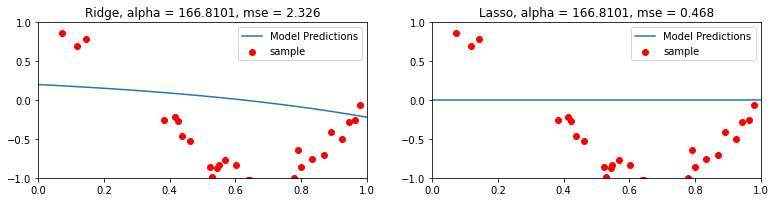

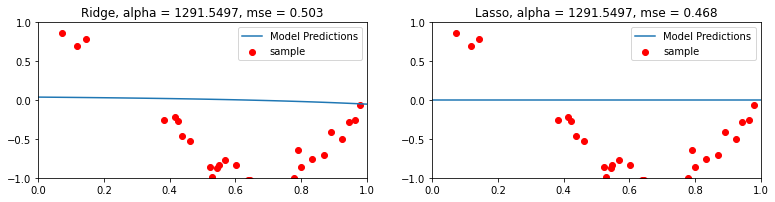

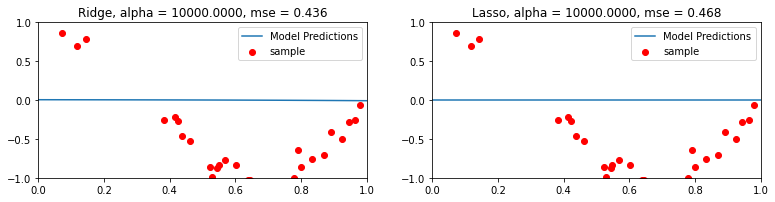

In [37]:
from sklearn.linear_model import Ridge, Lasso
import pandas as pd

DEGREE = 5
NUM_ALPHAS = 10
alphas = np.logspace(-4, 4, NUM_ALPHAS)


poly_features = PolynomialFeatures(degree = DEGREE)
coef_matrix_lasso = np.zeros((DEGREE + 1, NUM_ALPHAS))
coef_matrix_ridge = np.zeros((DEGREE + 1, NUM_ALPHAS))

for alpha_ind, alpha in enumerate(alphas):
    
    lasso = Lasso(alpha = alpha, fit_intercept=False, max_iter=500000)
    ridge = Ridge(alpha = alpha, fit_intercept=False, max_iter=500000)

    models = {ridge: 'Ridge', lasso: 'Lasso'}
    fig = plt.figure(figsize=(20,20))
    i = 0

    for model, model_name in models.items():

            pipeline = Pipeline([
                ('PolyFeatures', poly_features),
                ('scale', StandardScaler()),
                ('classifier', model),
            ])

            i += 1
            fig.add_subplot(6,3,i)
            pipeline.fit(X.reshape(-1, 1),y)
            y_pred = pipeline.predict(x_test.reshape(-1, 1))
            plt.scatter(X, y, label = 'sample', c = 'r')
#             plt.plot(X, true_fun(X), label = 'true function', c = 'g')
            plt.plot(x_test, y_pred, label = 'Model Predictions')
            mse = cross_val_score(pipeline, x_test.reshape(-1, 1), y_test, cv=CV, scoring = 'neg_mean_squared_error')
            title = f'{(model_name)}, alpha = {alpha:.4f}, mse = {-np.mean(mse):.3f}'
            plt.ylim(-1, 1)
            plt.xlim(0, 1)
            plt.title(title)
            plt.legend()
            
            if model_name == 'Lasso':
                coef_matrix_lasso[:,alpha_ind] = model.coef_
            else:
                coef_matrix_ridge[:,alpha_ind] = model.coef_
            
            
df_lasso = pd.DataFrame(coef_matrix_lasso, columns = alphas, )
df_ridge = pd.DataFrame(coef_matrix_ridge, columns = alphas)
print('coefs for Lasso with different alphas')
display(df_lasso)
print('coefs for Ridge with different alphas')
display(df_ridge)



__What is the take home message?__

***

We can see the Lasso is more aggressive and for the same alphas, it zeros more coefs, and making the model simpler and does sort of a 'feature selection' by zeroing out features. i.e: With Alpha of 0.32 the model prediction is a line (1 degree polynomial). With the same alphas, Ridge weights are getting smaller, but not as much (with 0.32 the model is still polynomial) and don't zero out.
***

In [38]:
def plot_alphasWeights(alphas, coefs, name):

    ax = plt.gca()

    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title(name + ' coefficients as a function of the regularization')
    plt.axis('tight')
    plt.show()
    


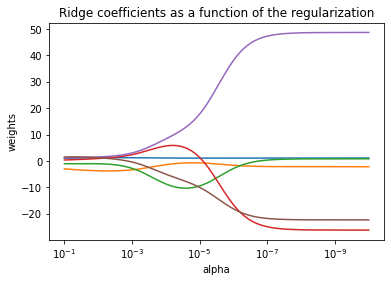

In [39]:
from sklearn.pipeline import make_pipeline
ridge = Ridge(alpha=1, fit_intercept=False)
n_alphas = 200
alphas = np.logspace(-10, -1, n_alphas)
poly = PolynomialFeatures(DEGREE)
coefs = []
ridge = Ridge(fit_intercept=False) 
    
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    pipe_ridge = make_pipeline(poly,ridge)
    pipe_ridge.fit(X.reshape(-1,1),y)
    coefs.append(pipe_ridge.named_steps['ridge'].coef_)

plot_alphasWeights(alphas,coefs, 'Ridge') 


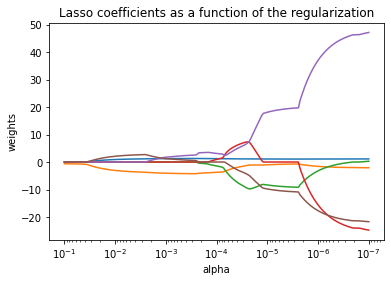

In [40]:
alphas = np.logspace(-7, -1, n_alphas)
coefs=[]
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000000)
    pipe_ridge = make_pipeline(poly,lasso)
    pipe_ridge.fit(X.reshape(-1,1),y)
    coefs.append(pipe_ridge.named_steps['lasso'].coef_)
plot_alphasWeights(alphas, coefs, 'Lasso')

__Take home message:__
1. for both plots, both regularization methods, we can see that higher alpha values reduce the values of the coefficients and make them smaller, closer to each other and to 0. As we decrease alpha it's affect diminshes and the opposite ocurres - bigger and more spread values for the coefficients.
2. We can see the difference between Lasso and Ridge with that aspect - for the same alpha the effect with Lasso will be much more pronounced - it will reduce the weights much more dramatically. It also means that for Lasso we can get the same effect as Ridge for smaller alphas. Another differnce is that Ridge graph is 'smoother' (due to the use of square) and changes in the weights are more gradual, linear and less sharp in comparison to Lasso. Ridge is also more tolerant to very small alphas which will cause Lasso convergance problem.